In [0]:
import numpy as np
from keras.layers import Input,Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [0]:
encoding_dim=32

In [0]:
input_img=Input(shape=(784,))
encoded=Dense(encoding_dim,activation="relu")(input_img)
decoded=Dense(784,activation="sigmoid")(encoded)
autoencoder=Model(input_img,decoded)
encoder=Model(input_img,encoded)
encoded_input=Input(shape=(encoding_dim,))
decoded_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoded_layer(encoded_input))
autoencoder.compile(optimizer="adadelta",loss="binary_crossentropy")

In [12]:
(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.astype("float32")/255.0
X_test=X_test.astype("float32")/255.0
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.3579 - val_loss: 0.2705
Epoch 2/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2626 - val_loss: 0.2511
Epoch 3/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.2405 - val_loss: 0.2278
Epoch 4/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.2194 - val_loss: 0.2094
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.2046 - val_loss: 0.1974
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1944 - val_loss: 0.1886
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1865 - val_loss: 0.1815
Epoch 8/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1798 - val_loss: 0.1753
Epoch 9/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1740 - val_loss: 0.1698
Epoch

In [0]:
encoded_img=encoder.predict(X_test)
decoded_img=decoder.predict(encoded_img)

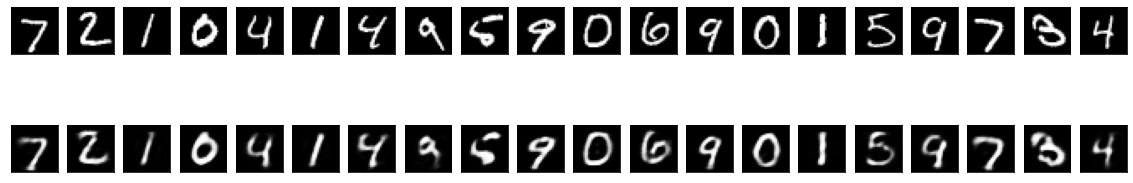

In [18]:
n=20
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()